In [1]:
!nvidia-smi

Thu Apr 11 09:27:28 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.40       Driver Version: 516.40       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   41C    P8     5W /  N/A |      0MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import tensorflow as tf
tf.__version__

'2.15.0'

Here we can see how each image have difference dimensions

In [ ]:
num_images_to_display = 5

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)) # Convert color from BGR to RGB for proper visualization
    plt.axis('off')
    plt.title(f"Image {i+1}")

plt.show()

In [8]:
from glob import glob

# Assuming /content/DataSet/train/ contains folders like 'class1', 'class2', etc.
folders = glob('C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/train/*')

# 'folders' will be a list of paths to the subdirectories within /content/DataSet/train/
folders


['C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/train\\Type_1',
 'C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/train\\Type_2',
 'C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/train\\Type_3']

In [9]:
import pandas as pd
from glob import glob
import os

basepath = 'C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/train'

train_cervix_images = []

for path in sorted(glob(basepath + "\\*")):  # Use double backslashes or raw string
    cervix_type = os.path.basename(path)  # Use os.path.basename to get the last part of the path
    cervix_images = sorted(glob(basepath + f"\\{cervix_type}/*"))  # Use double backslashes or raw string
    train_cervix_images = train_cervix_images + cervix_images

train_cervix_images = pd.DataFrame({'imagepath': train_cervix_images})
train_cervix_images['filetype'] = train_cervix_images['imagepath'].apply(lambda path: path.split(".")[-1])
train_cervix_images['type'] = train_cervix_images['imagepath'].apply(lambda path: path.split("\\")[-2])  # Use double backslashes or raw string
print(train_cervix_images['imagepath'][1480])


C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/train\Type_3\996.jpg


In [3]:
#ere the total no of trianing dataset is shown
train_cervix_images.shape

(1481, 3)

In [10]:
#Test dataset stored here
import os

# Specify the path to the test images folder
test_images_folder = 'C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/'

# Use os.listdir to get all files in the folder and sort them
#test_cervix_images = [os.path.join(test_images_folder, filename) for filename in sorted(os.listdir(test_images_folder)) if filename.endswith('.jpg')]
#test_cervix_images = [os.path.join(test_images_folder, filename) for filename in os.listdir(test_images_folder) if filename.endswith('.jpg')]
test_cervix_images=[os.path.join(test_images_folder, filename) for filename in os.listdir(test_images_folder) if filename.endswith('.jpg')]

# Sort the list of image paths numerically
test_cervix_images.sort(key=lambda x: int(os.path.splitext(os.path.basename(x))[0]))

# Sort the list of image paths
#test_cervix_images.sort()
# Display the first few paths as a sample
print("Sample test image paths:")
for path in test_cervix_images[0:15]:
    print(path)

# Print the total number of images found
print("Total test images found:", len(test_cervix_images))


Sample test image paths:
C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/0.jpg
C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/1.jpg
C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/2.jpg
C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/3.jpg
C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/4.jpg
C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/5.jpg
C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/6.jpg
C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/7.jpg
C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/8.jpg
C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/9.jpg
C:/Users/ASUS/Downloads/Open_in_Jupyter/intel

Text(0.5, 0, 'training size fraction')

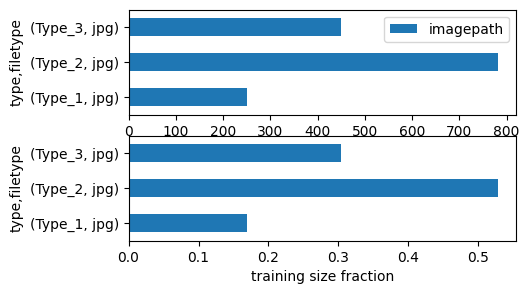

In [7]:
import numpy as np
import matplotlib.pyplot as plt
type_aggregation = train_cervix_images.groupby(['type', 'filetype']).agg('count')
type_aggregation_p = type_aggregation.apply(lambda row: 1.0*row['imagepath']/train_cervix_images.shape[0], axis=1)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 3))

type_aggregation.plot.barh(ax=axes[0])
axes[0].set_xlabel("image count")
type_aggregation_p.plot.barh(ax=axes[1])
axes[1].set_xlabel("training size fraction")

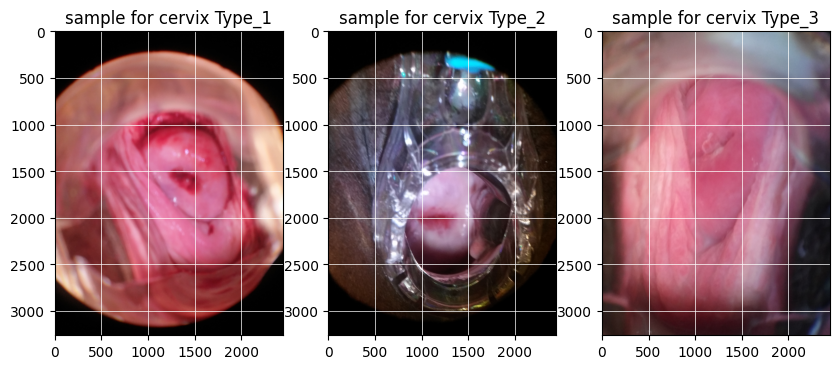

In [9]:
fig = plt.figure(figsize=(10,4))

i = 1
for t in train_cervix_images['type'].unique():
    ax = fig.add_subplot(1,3,i)
    i+=1
    f = train_cervix_images[train_cervix_images['type'] == t]['imagepath'].values[0]
    plt.imshow(plt.imread(f)) 
    plt.grid(True, color='white', linestyle='-', linewidth=0.5)
    plt.title('sample for cervix {}'.format(t))


## **Image dimensions**

Now, in order to get an idea of how many different shapes of images by class there are, lets have a look at. To reduce runtime, take only a subsample per class.

In [6]:
from collections import defaultdict

import cv2

images = defaultdict(list)

for t in train_cervix_images['type'].unique():
    sample_counter = 0
    for _, row in train_cervix_images[train_cervix_images['type'] == t].iterrows():
        #print('reading image {}'.format(row.imagepath))
        try:
            img = cv2.imread(row.imagepath)
            sample_counter +=1
            images[t].append(img)
        except:
            print('image read failed for {}'.format(row.imagepath))
        if sample_counter > 35:
            break

In [7]:
len(images['Type_1'])

36

In [8]:
dfs = []
for t in train_cervix_images['type'].unique():
    t_ = pd.DataFrame(
        {
            'nrows': list(map(lambda i: i.shape[0], images[t])),
            'ncols': list(map(lambda i: i.shape[1], images[t])),
            'nchans': list(map(lambda i: i.shape[2], images[t])),
            'type': t
        }
    )
    dfs.append(t_)

shapes_df = pd.concat(dfs, axis=0)
shapes_df_grouped = shapes_df.groupby(by=['nchans', 'ncols', 'nrows', 'type']).size().reset_index().sort_values(['type', 0], ascending=False)
shapes_df_grouped   #we can see all the images in our sample has 3 channels

nchans  ncols  nrows    type   0
3       3   2448   3264  Type_3  28
6       3   3096   4128  Type_3   7
7       3   3264   2448  Type_3   1
5       3   3096   4128  Type_2  18
2       3   2448   3264  Type_2  17
8       3   4128   3096  Type_2   1
1       3   2448   3264  Type_1  18
4       3   3096   4128  Type_1  17
0       3   2322   4128  Type_1   1

In [9]:
dfs

[    nrows  ncols  nchans    type
 0    3264   2448       3  Type_1
 1    4128   3096       3  Type_1
 2    3264   2448       3  Type_1
 3    4128   3096       3  Type_1
 4    3264   2448       3  Type_1
 5    3264   2448       3  Type_1
 6    4128   3096       3  Type_1
 7    3264   2448       3  Type_1
 8    4128   3096       3  Type_1
 9    4128   2322       3  Type_1
 10   4128   3096       3  Type_1
 11   4128   3096       3  Type_1
 12   3264   2448       3  Type_1
 13   3264   2448       3  Type_1
 14   4128   3096       3  Type_1
 15   3264   2448       3  Type_1
 16   3264   2448       3  Type_1
 17   3264   2448       3  Type_1
 18   4128   3096       3  Type_1
 19   3264   2448       3  Type_1
 20   3264   2448       3  Type_1
 21   3264   2448       3  Type_1
 22   3264   2448       3  Type_1
 23   4128   3096       3  Type_1
 24   4128   3096       3  Type_1
 25   4128   3096       3  Type_1
 26   4128   3096       3  Type_1
 27   4128   3096       3  Type_1
 28   4128   3

Now lets build a barplot to get an idea of the distribution of image dimensions by cervix type.

<Axes: xlabel='count', ylabel='size_with_type'>

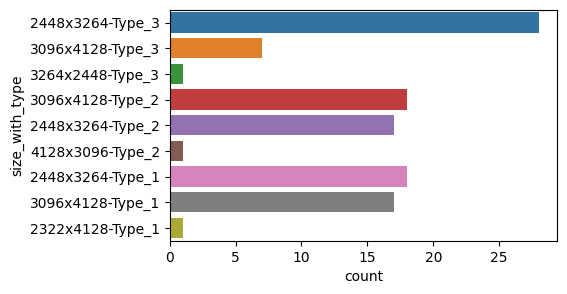

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
shapes_df_grouped['size_with_type'] = shapes_df_grouped.apply(lambda row: '{}x{}-{}'.format(row.ncols, row.nrows, row.type), axis=1)
shapes_df_grouped = shapes_df_grouped.set_index(shapes_df_grouped['size_with_type'].values)
shapes_df_grouped['count'] = shapes_df_grouped[[0]]

plt.figure(figsize=(5,3))
#shapes_df_grouped['count'].plot.barh(figsize=(10,8))
sns.barplot(x="count", y="size_with_type", data=shapes_df_grouped)

## **TSNE Embedding**
##### t-SNE is a dimensionality reduction technique used for visualizing high-dimensional data in a lower-dimensional space (commonly 2D or 3D). It's primarily employed as a tool for exploratory data analysis and visualization rather than a method for augmenting the training data.

#####We will now take all of the sample images, rescale them & convert them to grayscale. This will result in a matrix, where each row are all flattened pixel for the grayscale images.

The original images have, as we have seen earlier, quite a high resolution, so scaling them down to 100 x 100 is resulting in a great loss of information, so the embedding to two dimensions is likely not going to have a good structure where we can separate visually by cervical cancer types. Also, we are giving only very few images per class that TSNE can work with to find a good, distance preserving, embedding.

Reducing the dimensionality and using grayscale images may help mitigate this issue.

**Loss of Information:**

Although reducing the resolution and converting to grayscale results in a loss of information, in some cases, this trade-off is acceptable, especially when the goal is to visualize and explore the dataset's structure rather than precisely classify images.

In [13]:
import numpy as np
def transform_image(img, rescaled_dim, to_gray=False):
    resized = cv2.resize(img, (rescaled_dim, rescaled_dim), cv2.INTER_LINEAR)

    if to_gray:
        resized = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY).astype('float')
    else:
        resized = resized.astype('float')

    normalized = cv2.normalize(resized, None, 0.0, 1.0, cv2.NORM_MINMAX)
    timg = normalized.reshape(1, np.prod(normalized.shape))

    return timg/np.linalg.norm(timg) #The L2 norm (Euclidean norm) of the flattened image is computed using np.linalg.norm.

rescaled_dim = 100

all_images = []
all_image_types = []

for t in train_cervix_images['type'].unique():
    all_images = all_images + images[t]
    all_image_types = all_image_types + len(images[t])*[t]
# - normalize each uint8 image to the value interval [0, 1] as float image
# - rgb to gray
# - downsample image to rescaled_dim X rescaled_dim
# - L2 norm of each sample = 1
gray_all_images_as_vecs = [transform_image(img, rescaled_dim) for img in all_images]

gray_imgs_mat = np.array(gray_all_images_as_vecs).squeeze()
all_image_types = np.array(all_image_types)
gray_imgs_mat.shape, all_image_types.shape  #output will show the dataset contains 108 images, each represented as a 1D array of length 30000 after transformation.

((108, 30000), (108,))

#### 3D t-SNE with cervix indicators
##### Now let's project the 100x100x3 images to three dimensions to check for low dimensional patterns.

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(    #tsne will store the coordinates of the data points of each image in 3d space
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=2
).fit_transform(gray_imgs_mat)

#KL divergence is used to measure the difference between the original high-dimensional space
#and the lower-dimensional space created by the t-SNE algorithm.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 108 samples in 0.006s...
[t-SNE] Computed neighbors for 108 samples in 0.334s...
[t-SNE] Computed conditional probabilities for sample 108 / 108
[t-SNE] Mean sigma: 0.222224
[t-SNE] Computed conditional probabilities in 0.005s
[t-SNE] Iteration 50: error = 79.4415283, gradient norm = 0.3009650 (50 iterations in 0.021s)
[t-SNE] Iteration 100: error = 90.2935867, gradient norm = 0.7191478 (50 iterations in 0.021s)
[t-SNE] Iteration 150: error = 104.6173096, gradient norm = 0.1245096 (50 iterations in 0.021s)
[t-SNE] Iteration 200: error = 109.5240479, gradient norm = 1.4275659 (50 iterations in 0.021s)
[t-SNE] Iteration 250: error = 123.2170105, gradient norm = 0.4862758 (50 iterations in 0.020s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 123.217010
[t-SNE] Iteration 300: error = 3.4012547, gradient norm = 0.0089903 (50 iterations in 0.020s)
[t-SNE] Iteration 350: error = 2.8382466, gradient norm = 0.00718

In [19]:
from sklearn import preprocessing
import plotly.graph_objects as go
import plotly.offline as py


trace1 = go.Scatter3d(
    x=tsne[:, 0],
    y=tsne[:, 1],
    z=tsne[:, 2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color=preprocessing.LabelEncoder().fit_transform(all_image_types),
        colorscale='Portland',
        colorbar=dict(title='cervix types'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.9
    )
)

data = [trace1]

layout = dict(
    height=800,
    width=800,
    title='3D embedding of images',
    scene=dict(
        xaxis=dict(gridcolor='rgba(0, 0, 0, 0.2)', gridwidth=2),  # Adjust x-axis grid properties
        yaxis=dict(gridcolor='rgba(0, 0, 0, 0.2)', gridwidth=2),  # Adjust y-axis grid properties
        zaxis=dict(gridcolor='rgba(0, 0, 0, 0.2)', gridwidth=2),  # Adjust z-axis grid properties
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='TSNE_Embedding')


#####We can clearly see that there is a big heterogeneous cluster and a few quite distant outliers.

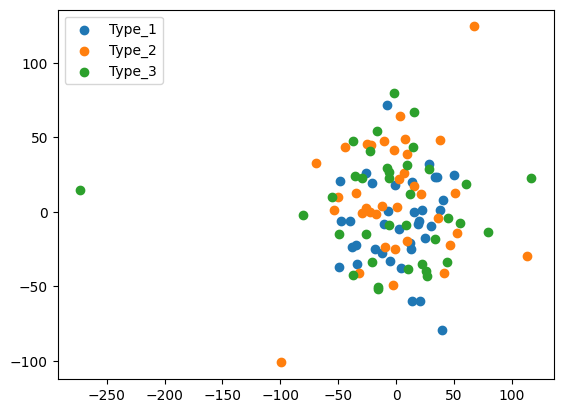

In [ ]:

for t in train_cervix_images['type'].unique():
    tsne_t = tsne[np.where(all_image_types == t), :][0]
    plt.scatter(tsne_t[:, 0], tsne_t[:, 1])
plt.legend(train_cervix_images['type'].unique())

##**Image clustering with TSNE embedding**
#####Let us now use the compressed images and the distance-preserving transformation of TSNE to get an understanding of what image clusters there are.

For that we will use matplotlib to replace the previously red, green and blue points with the actual images that were input to the TSNE transformation.

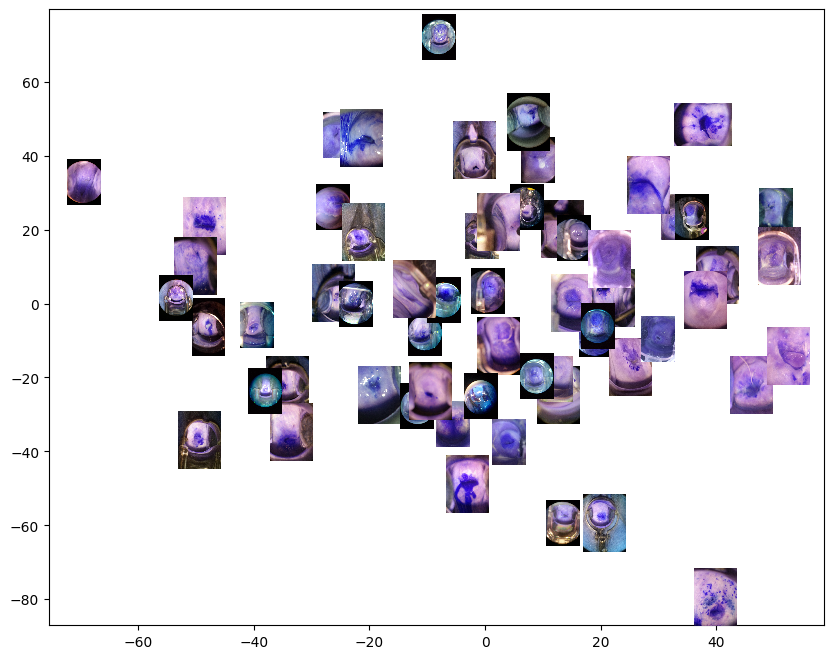

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def imscatter(x, y, images, ax=None, zoom=0.01):
    ax = plt.gca()
    images = [OffsetImage(image, zoom=zoom) for image in images]
    artists = []
    for x0, y0, im0 in zip(x, y, images):
        ab = AnnotationBbox(im0, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    #return artists

nimgs = 60
plt.figure(figsize=(10,8))
imscatter(tsne[0:nimgs,0], tsne[0:nimgs,1], all_images[0:nimgs])

### Data Augmentation

In [6]:
import cv2
import numpy as np
from skimage import transform

# a. Resizing images to 180x180
resized_images = []
for image_path in train_cervix_images['imagepath']:
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (180, 180))
    resized_images.append(img_resized)

# b. Normalizing pixel values
normalized_images = np.array(resized_images) / 255.0

# c. Applying image deformations (rotation, flip horizontal, flip vertical)
augmented_images = []
for img in normalized_images:
    # Random rotation between -45 and 45 degrees
    rotated_img = transform.rotate(img, np.random.uniform(-45, 45))

    # Random horizontal flip
    if np.random.choice([True, False]):
        rotated_img = np.fliplr(rotated_img)

    # Random vertical flip
    if np.random.choice([True, False]):
        rotated_img = np.flipud(rotated_img)

    augmented_images.append(rotated_img)

# d. Storing data in NumPy format
np.save('C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/train_data.npy', np.array(augmented_images))


In [7]:
import cv2
import numpy as np
from skimage import transform

# a. Resizing images to 180x180
resized_images = []
for image_path in test_cervix_images:
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (180, 180))
    resized_images.append(img_resized)

# b. Normalizing pixel values
normalized_images = np.array(resized_images) / 255.0

# c. Applying image deformations (rotation, flip horizontal, flip vertical)
augmented_test_images = []
for img in normalized_images:
    # Random rotation between -45 and 45 degrees
    rotated_img = transform.rotate(img, np.random.uniform(-45, 45))

    # Random horizontal flip
    if np.random.choice([True, False]):
        rotated_img = np.fliplr(rotated_img)

    # Random vertical flip
    if np.random.choice([True, False]):
        rotated_img = np.flipud(rotated_img)

    augmented_test_images.append(rotated_img)

# d. Storing data in NumPy format
np.save('C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test_data.npy', np.array(augmented_test_images))

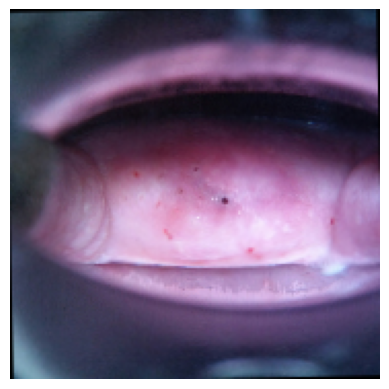

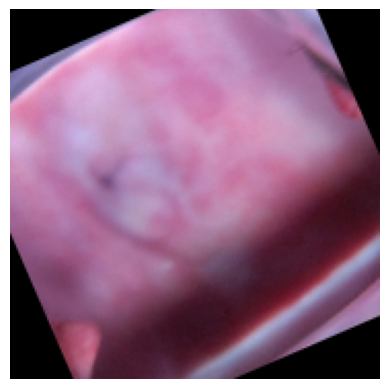

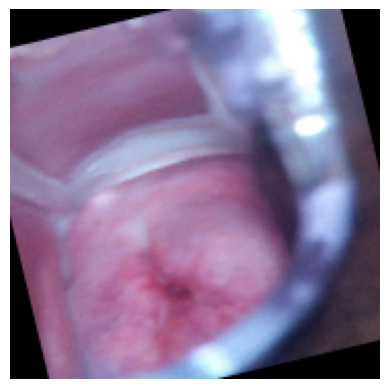

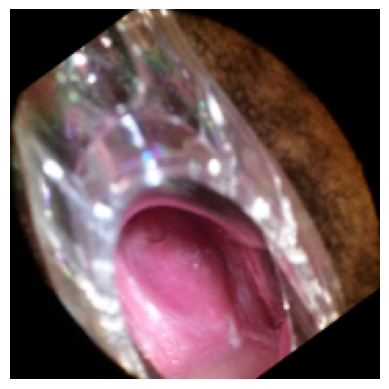

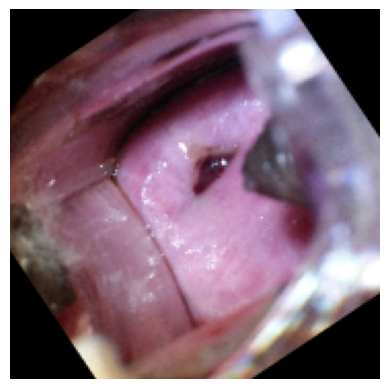

1481

In [8]:
import matplotlib.pyplot as plt

# Assuming augmented_images is your NumPy array containing BGR images
for i in range(1200,1205,1):
    # Convert from BGR to RGB
    img_rgb = augmented_images[i][:, :, ::-1]  # This is a quick way to reverse the order of color channels
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
len(augmented_images)

In [ ]:
import cv2
import numpy as np

# Assuming 'augmented_images' is your list of augmented images

# Set cropping parameters (adjust as needed)
top_crop = 10
bottom_crop = 10
left_crop = 10
right_crop = 10

# List to store cropped images
cropped_images = []

for img in augmented_images:
    # Get image dimensions
    height, width = img.shape[:2]

    # Perform cropping
    cropped_img = img[top_crop:height - bottom_crop, left_crop:width - right_crop]

    # Append the cropped image to the list
    cropped_images.append(cropped_img)

# Convert the list of cropped images to a NumPy array
cropped_images_array = np.array(cropped_images)

# Display the original and cropped images (adjust indices as needed)
original_image = augmented_images[0]
cropped_image = cropped_images_array[0]

# Display original image
cv2.imshow('Original Image', original_image)
cv2.waitKey(0)

# Display cropped image
cv2.imshow('Cropped Image', cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


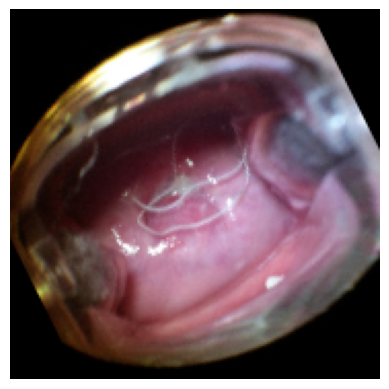

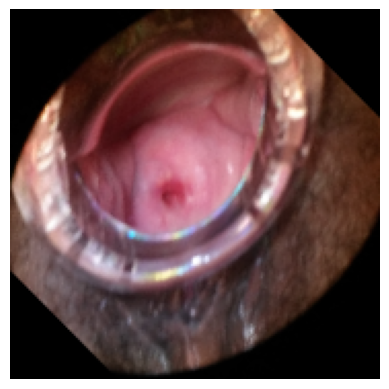

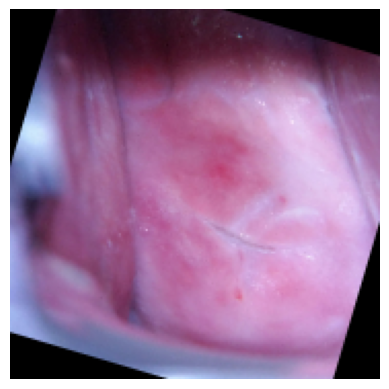

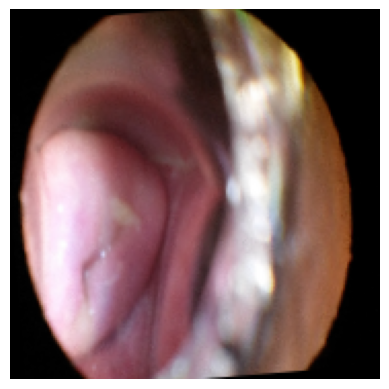

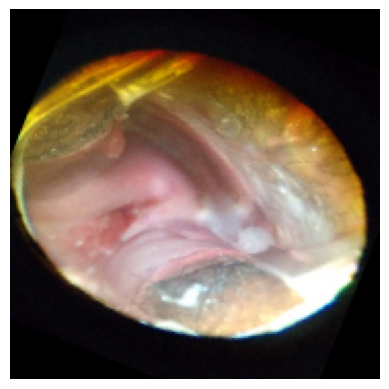

512

In [9]:
import matplotlib.pyplot as plt

# Assuming augmented_test_images is your NumPy array containing BGR images
for i in range(420,425,1):
    # Convert from BGR to RGB
    img_rgb = augmented_test_images[i][:, :, ::-1]  # This is a quick way to reverse the order of color channels
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
len(augmented_test_images)

##### VGG16

In [15]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Dummy labels for illustration purposes, replace with actual labels
y_t = []
for t in train_cervix_images['type']:
    y_t.append(t)

# Encode labels using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_t)

# Convert encoded labels to one-hot encoding
y_onehot = to_categorical(y_encoded, num_classes=3)


# VGG16 model with pre-trained weights (include_top=False to exclude fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the pre-trained layers
for layer in base_model.layers[:15]:  # Freeze the first 15 layers, adjust as needed
    layer.trainable = False

# Create a new model on top of VGG16
model = Sequential()
model.add(base_model)
# Add convolutional layer kernel
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(Conv2D(256, (2, 2), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dropout(0.5))  # Add Dropout layer to reduce overfitting
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming 3 output classes

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(np.array(augmented_images), np.array(y_onehot), test_size=0.2, random_state=42)

# Define callbacks to prevent overfitting
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=callbacks)

# Make predictions on the test set
predictions = model.predict(np.array(augmented_test_images))
predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))

# Print predicted labels
print(predicted_labels)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 5, 64)          131136    
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 128)         32896     
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 256)         131328    
                                                                 
 flatten_4 (Flatten)         (None, 6400)              0         
                                                                 
 dropout_1 (Dropout)         (None, 6400)              0         
                                                                 
 dense_6 (Dense)             (None, 256)              

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - ETA: 0s - loss: 0.9761 - accuracy: 0.5473
Epoch 2: val_loss improved from 1.04624 to 0.98046, saving model to best_model.h5
37/37 [==============================] - 127s 3s/step - loss: 0.9761 - accuracy: 0.5473 - val_loss: 0.9805 - val_accuracy: 0.5320 - lr: 0.0100
Epoch 3/50
37/37 [==============================] - ETA: 0s - loss: 0.9532 - accuracy: 0.5524
Epoch 3: val_loss improved from 0.98046 to 0.95376, saving model to best_model.h5
37/37 [==============================] - 125s 3s/step - loss: 0.9532 - accuracy: 0.5524 - val_loss: 0.9538 - val_accuracy: 0.5556 - lr: 0.0100
Epoch 4/50
37/37 [==============================] - ETA: 0s - loss: 0.9141 - accuracy: 0.5777
Epoch 4: val_loss improved from 0.95376 to 0.89410, saving model to best_model.h5
37/37 [==============================] - 123s 3s/step - loss: 0.9141 - accuracy: 0.5777 - val_loss: 0.8941 - val_accuracy: 0.6061 - lr: 0.0100
Epoch 5/50
37/37 [==============================] - ET

In [16]:
#save predicted labels in a csv file
import pandas as pd
df = pd.DataFrame(predicted_labels)
df.to_csv('C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/predicted_labels.csv')

In [3]:
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#import True labels.csv file from path C:\Users\ASUS\Downloads\Open_in_Jupyter\intel-mobileodt-cervical-cancer-screening\True_labels.csv
true_labels = pd.read_csv('C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/True_labels.csv')
#import predicted_labels.csv file from C:\Users\ASUS\Downloads\Open_in_Jupyter\intel-mobileodt-cervical-cancer-screening\predicted_labels.csv
predicted_labels = pd.read_csv('C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/predicted_labels.csv')
#true_labels, predicted_labels['0']
le=LabelEncoder()
true_labels_encoded = le.fit_transform(true_labels['0'])

# Calculate predicted labels
predicted_labels_encoded = le.transform(predicted_labels['0'])

# Calculate accuracy
accuracy = accuracy_score(true_labels_encoded, predicted_labels_encoded)

# Display accuracy
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.8203125


In [4]:
# Performance Metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
import numpy as np

# Calculate precision
precision = precision_score(true_labels_encoded, predicted_labels_encoded, average='macro')
print(f'Precision: {precision}')

# Calculate recall (sensitivity)
recall = recall_score(true_labels_encoded, predicted_labels_encoded, average='macro')
print(f'Recall (Sensitivity): {recall}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels_encoded, predicted_labels_encoded)
print(f'Confusion Matrix:\n{conf_matrix}')

# Full classification report
report = classification_report(true_labels_encoded, predicted_labels_encoded, target_names=le.classes_)
print(f'Classification Report:\n{report}')

Precision: 0.8582213022061218
Recall (Sensitivity): 0.7750221390876888
Confusion Matrix:
[[ 50  32   5]
 [  0 227  38]
 [  1  16 143]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       0.98      0.57      0.72        87
      Type_2       0.83      0.86      0.84       265
      Type_3       0.77      0.89      0.83       160

    accuracy                           0.82       512
   macro avg       0.86      0.78      0.80       512
weighted avg       0.83      0.82      0.82       512



In [30]:
print("Shape of true_labels_onehot:", true_labels_onehot.shape)
print("Shape of predicted_labels_onehot:", predicted_labels_onehot.shape)
true_labels_encoded[0]

Shape of true_labels_onehot: (512, 3)
Shape of predicted_labels_onehot: (512, 3)


1

### Inception V3

In [39]:
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming augmented_images and augmented_test_images are your NumPy arrays
# Adjust these arrays based on your actual data

# Dummy labels for illustration purposes, replace with actual labels
y_t = []
for t in train_cervix_images['type']:
    y_t.append(t)

# Encode labels using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_t)

# Convert encoded labels to one-hot encoding
y_onehot = to_categorical(y_encoded, num_classes=3)

# InceptionV3 model with pre-trained weights (include_top=False to exclude fully connected layers)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of InceptionV3
model = Sequential()
model.add(base_model)

# Add convolutional layers
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(Conv2D(256, (2, 2), activation='relu', padding='same'))

# Add GlobalAveragePooling2D and Flatten layers
#model.add(GlobalAveragePooling2D())
model.add(Flatten())

# Add Dense layers with Dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(3, activation='softmax'))  # Assuming 3 output classes

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(np.array(augmented_images), np.array(y_onehot), test_size=0.2, random_state=42)

# Set callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[reduce_lr, early_stopping, checkpoint])

# Make predictions on the test set
predictions = model.predict(np.array(augmented_test_images))
predicted_labels = le.inverse_transform(np.argmax(predictions, axis=1))

# Print predicted labels
print(predicted_labels)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 conv2d_685 (Conv2D)         (None, 4, 4, 64)          524352    
                                                                 
 conv2d_686 (Conv2D)         (None, 4, 4, 128)         32896     
                                                                 
 conv2d_687 (Conv2D)         (None, 4, 4, 256)         131328    
                                                                 
 flatten_11 (Flatten)        (None, 4096)              0         
                                                                 
 dense_20 (Dense)            (None, 256)               1048832   
                                                                 
 dropout_9 (Dropout)         (None, 256)             

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - 22s 439ms/step - loss: 1.0558 - accuracy: 0.5025 - val_loss: 1.0501 - val_accuracy: 0.4613 - lr: 0.0100
Epoch 2/50
37/37 [==============================] - 14s 388ms/step - loss: 0.9970 - accuracy: 0.5414 - val_loss: 1.0183 - val_accuracy: 0.4882 - lr: 0.0100
Epoch 3/50
37/37 [==============================] - 14s 376ms/step - loss: 0.9764 - accuracy: 0.5507 - val_loss: 1.0306 - val_accuracy: 0.4478 - lr: 0.0100
Epoch 4/50
37/37 [==============================] - 14s 375ms/step - loss: 0.9537 - accuracy: 0.5709 - val_loss: 1.0209 - val_accuracy: 0.4613 - lr: 0.0100
Epoch 5/50
37/37 [==============================] - 14s 379ms/step - loss: 0.9603 - accuracy: 0.5405 - val_loss: 1.0329 - val_accuracy: 0.4613 - lr: 0.0100
Epoch 6/50
37/37 [==============================] - 14s 387ms/step - loss: 0.9226 - accuracy: 0.5431 - val_loss: 0.9954 - val_accuracy: 0.4747 - lr: 0.0100
Epoch 7/50
37/37 [==============================] - 14s 376ms/step - loss: 

In [41]:
#save predicted labels in a csv file
import pandas as pd
df = pd.DataFrame(predicted_labels)
df.to_csv('C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/predicted_labels_inception.csv')

In [6]:
from sklearn.metrics import accuracy_score
import pandas as pd
#import True labels.csv file from path C:\Users\ASUS\Downloads\Open_in_Jupyter\intel-mobileodt-cervical-cancer-screening\True_labels.csv
true_labels = pd.read_csv('C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/True_labels.csv')
#import predicted_labels.csv file from C:\Users\ASUS\Downloads\Open_in_Jupyter\intel-mobileodt-cervical-cancer-screening\predicted_labels.csv
predicted_labels_inception = pd.read_csv('C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/predicted_labels_inception.csv')
#true_labels, predicted_labels['0']

true_labels_encoded = le.fit_transform(true_labels['0'])

# Calculate predicted labels
predicted_labels_encodedincep= le.transform(predicted_labels_inception['0'])

# Calculate accuracy
accuracy = accuracy_score(true_labels_encoded, predicted_labels_encodedincep)

# Display accuracy
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.861328125


In [9]:
# Performance Metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
import numpy as np

# Calculate precision
precision = precision_score(true_labels_encoded, predicted_labels_encodedincep, average='macro')
print(f'Precision: {precision}')

# Calculate recall (sensitivity)
recall = recall_score(true_labels_encoded, predicted_labels_encodedincep, average='macro')
print(f'Recall (Sensitivity): {recall}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels_encoded, predicted_labels_encoded)
print(f'Confusion Matrix:\n{conf_matrix}')

# Full classification report
report = classification_report(true_labels_encoded, predicted_labels_encoded, target_names=le.classes_)
print(f'Classification Report:\n{report}')

Precision: 0.890522465164335
Recall (Sensitivity): 0.8324170461938842
Confusion Matrix:
[[ 63  18   6]
 [  0 238  27]
 [  0  20 140]]
Classification Report:
              precision    recall  f1-score   support

      Type_1       1.00      0.72      0.84        87
      Type_2       0.86      0.90      0.88       265
      Type_3       0.81      0.88      0.84       160

    accuracy                           0.86       512
   macro avg       0.89      0.83      0.85       512
weighted avg       0.87      0.86      0.86       512



In [13]:
#Map
# Precision and recall values for VGG16
precision_vgg16 = [0.98, 0.83, 0.77]
recall_vgg16 = [0.57, 0.86, 0.89]

# Precision and recall values for InceptionV3
precision_inceptionv3 = [0.98, 0.86, 0.81]
recall_inceptionv3 = [0.72, 0.90, 0.88]

# Calculate average precision for each class
ap_vgg16 = [precision_vgg16[i] * recall_vgg16[i] for i in range(len(precision_vgg16))]
ap_inceptionv3 = [precision_inceptionv3[i] * recall_inceptionv3[i] for i in range(len(precision_inceptionv3))]

# Calculate mAP for VGG16
mAP_vgg16 = sum(ap_vgg16) / len(ap_vgg16)

# Calculate mAP for InceptionV3
mAP_inceptionv3 = sum(ap_inceptionv3) / len(ap_inceptionv3)

print("Mean Average Precision (mAP) for VGG16:", mAP_vgg16)
print("Mean Average Precision (mAP) for InceptionV3:", mAP_inceptionv3)


Mean Average Precision (mAP) for VGG16: 0.6525666666666666
Mean Average Precision (mAP) for InceptionV3: 0.7308


#### Area Affected

In [47]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Xd0RearBWedqr2S1jW3y")
project = rf.workspace("myworkspace-atu2v").project("cervical_cancer-wlshc")
version = project.version(1)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...


In [48]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 1685, 'y': 2034, 'width': 633, 'height': 832, 'confidence': 0.459982693195343, 'class': 'Type_2', 'class_id': 1, 'detection_id': 'a2128678-1a58-463a-abae-35ecacddad31', 'image_path': 'C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/91.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '3096', 'height': '4128'}}


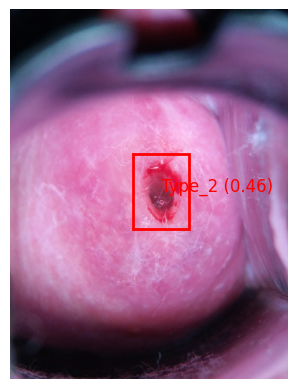

Percentage area affected:  4.120846102998618


In [10]:
""""To ensure that the bounding boxes are plotted correctly with respect to the original image, you may need to adjust the coordinate
system used by Matplotlib to match the coordinate system used by the prediction object. One common issue is the difference in the origin of the coordinate 
system (top-left corner vs. bottom-left corner). You can try adjusting the y-coordinates of the bounding boxes accordingly before plotting.
"""
from matplotlib import patches
import matplotlib.pyplot as plt

from roboflow import Roboflow
rf = Roboflow(api_key="Xd0RearBWedqr2S1jW3y")
project = rf.workspace().project("cervical_cancer-wlshc")
model = project.version(1).model

# infer on a local image
print(model.predict("C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/91.jpg", confidence=28, overlap=50).json())

# visualize your prediction
prediction= model.predict("C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/91.jpg", confidence=28, overlap=50)
prediction.save("p.jpg")
# Plot the image
# prediction.plot()

# Load the image
image_path = "C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/91.jpg"
image = plt.imread(image_path)

# Create a plot
plt.imshow(image)
plt.axis('off')

# Iterate over each prediction
for p in prediction:
    # Extract prediction information
    x = p["x"]
    y = p["y"]
    width = p["width"]
    height = p["height"]
    class_label = p["class"]
    confidence = p["confidence"]

    
    y1 = y-height/2
    x1 = x-width/2
    x2 = x+width/2
    y2 = y+height/2

    # Add bounding box and class label to the plot
    plt.text(x, y, f"{class_label} ({confidence:.2f})", fontsize=12, color='red')
    rect = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

# Show the image plot
plt.show()


# Percentage Area Affected
total_area=image.shape[0]*image.shape[1]
bbox_area=(x2-x1)*(y2-y1)
affected=(bbox_area/total_area)*100

print("Percentage area affected: ", affected)

In [45]:
print(prediction)
# Access the class label of the first prediction
class_label = prediction[0]["class"]
print(class_label, image.shape)

{
  "x": 1661,
  "y": 2005,
  "width": 720,
  "height": 851,
  "confidence": 0.32294443249702454,
  "class": "Type_2",
  "class_id": 1,
  "detection_id": "0012ef3a-2b80-41fc-9780-503343d99e20",
  "image_path": "C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/2.jpg",
  "prediction_type": "ObjectDetectionModel"
}


Type_2 (4128, 3096, 3)


loading Roboflow workspace...
loading Roboflow project...


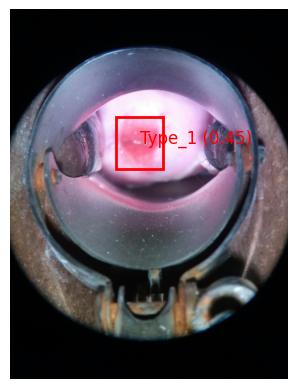

Percentage area affected: 2.366910667427839


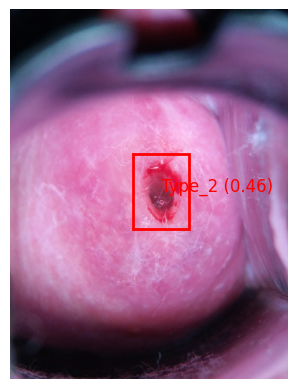

Percentage area affected: 4.120846102998618


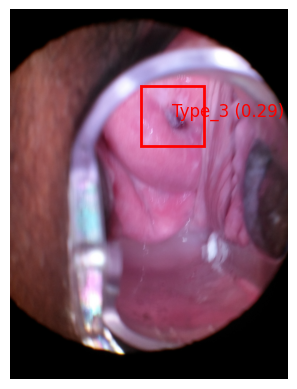

Percentage area affected: 3.613769343521722


Percentage area affected: 1.6789762484225708


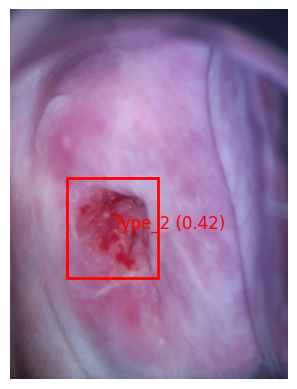

Percentage area affected: 8.954727780782406


In [11]:

from matplotlib import patches
import matplotlib.pyplot as plt
import os

from roboflow import Roboflow

rf = Roboflow(api_key="Xd0RearBWedqr2S1jW3y")
project = rf.workspace().project("cervical_cancer-wlshc")
model = project.version(1).model

# Path to the folder containing all 512 sample images
#images_folder = "C:/Users/ASUS/Downloads/Open_in_Jupyter/intel-mobileodt-cervical-cancer-screening/test/"

# Iterate over each image in the folder
for image_path in test_cervix_images[90:95]:
    
    # Infer on the current image
    prediction = model.predict(image_path, confidence=20, overlap=50)       #make confidence threshold 15 so it matches for all
     
    # Load the image
    image = plt.imread(image_path)

    # Create a plot
    plt.imshow(image)
    plt.axis('off')

    # Iterate over each prediction
    for p in prediction:
        # Extract prediction information
        x = p["x"]
        y = p["y"]
        width = p["width"]
        height = p["height"]
        class_label = p["class"]
        confidence = p["confidence"]

        y1 = y - height/2
        x1 = x - width/2
        x2 = x + width/2
        y2 = y + height/2

        # Add bounding box and class label to the plot
        plt.text(x, y, f"{class_label} ({confidence:.2f})", fontsize=12, color='red')
        rect = patches.Rectangle((x1, y1), (x2-x1), (y2-y1), linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

    # Show the image plot
    plt.show()

    # Calculate percentage area affected
    total_area = image.shape[0] * image.shape[1]
    bbox_area = (x2 - x1) * (y2 - y1)
    affected = (bbox_area / total_area) * 100

    print("Percentage area affected:", affected)

## Yolo model train

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.10.2 torch-2.2.0+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
Setup complete  (16 CPUs, 15.4 GB RAM, 434.0/952.7 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
import os

# Create a directory for datasets
os.makedirs("C:/Users/ASUS/Downloads/Open_in_Jupyter/datasets", exist_ok=True)

# Change directory to datasets
os.chdir("C:/Users/ASUS/Downloads/Open_in_Jupyter/datasets")

# Install roboflow package
!pip install roboflow --quiet

# Import Roboflow and download the dataset
from roboflow import Roboflow

rf = Roboflow(api_key="Xd0RearBWedqr2S1jW3y")
project = rf.workspace("myworkspace-atu2v").project("cervical_cancer-wlshc")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cervical_Cancer-1 in yolov8:: 100%|██████████| 2974/2974 [00:06<00:00, 481.86it/s]


In [1]:
import os

# Change directory to the specified path
os.chdir("C:/Users/ASUS/Downloads/Open_in_Jupyter/datasets")

# Run YOLO training task
!yolo task=detect mode=train model=yolov8s.pt data=C:/Users/ASUS/Downloads/Open_in_Jupyter/datasets/data.yaml epochs=80 imgsz=800 plots=True

In [8]:
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory:", cwd)

Current working directory: C:\Users\ASUS\Downloads\Open_in_Jupyter\datasets
